# MOTIF analysis

We had three resulting files from previous OrthoFinder analysis. We used [Web-Version of FIMO version 5.4.1](https://meme-suite.org/meme/tools/fimo) and core PFMs of plants from [Jaspar 2022](https://jaspar.genereg.net/downloads/). The 3 resulting FIMO files were renamed to `fimo_i.tsv`, where i corresponding to the groups:
1. Generative
2. Non-specific
3. Vegetative

Versions:
* Python - 3.8.8
* pandas - 1.4.1
* numpy - 1.22.4
* matplotlib - 3.5.2
* seaborn - 0.11.2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
fimo_1 = pd.read_csv('fimo_1.tsv', sep='\t').dropna()
fimo_2 = pd.read_csv('fimo_2.tsv', sep='\t').dropna()
fimo_3 = pd.read_csv('fimo_3.tsv', sep='\t').dropna()

In [4]:
print(fimo_1.shape)
print(fimo_2.shape)
print(fimo_3.shape)

(1976, 10)
(3206, 10)
(505, 10)


## Group 1 - Generative
Creating variables with unique genes and with motifs:

In [5]:
genes_1 = fimo_1['sequence_name'].unique()
motifs_1 = fimo_1['motif_alt_id'].unique()

Creating table where rows - genes and columns - motifs. If motif were found in this gene - 1, if not - 0.

In [6]:
genes_motifs_1 = np.zeros([genes_1.shape[0], motifs_1.shape[0]])
genes_motifs_1 = pd.DataFrame(genes_motifs_1, columns=motifs_1, index=genes_1)

In [7]:
for i in range(fimo_1.shape[0]):
    speci = fimo_1.iloc[i,2]
    motif = fimo_1.iloc[i,1]
    genes_motifs_1.loc[speci, motif] = 1

/home/annatoidze/anaconda3/envs/orthofinder/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


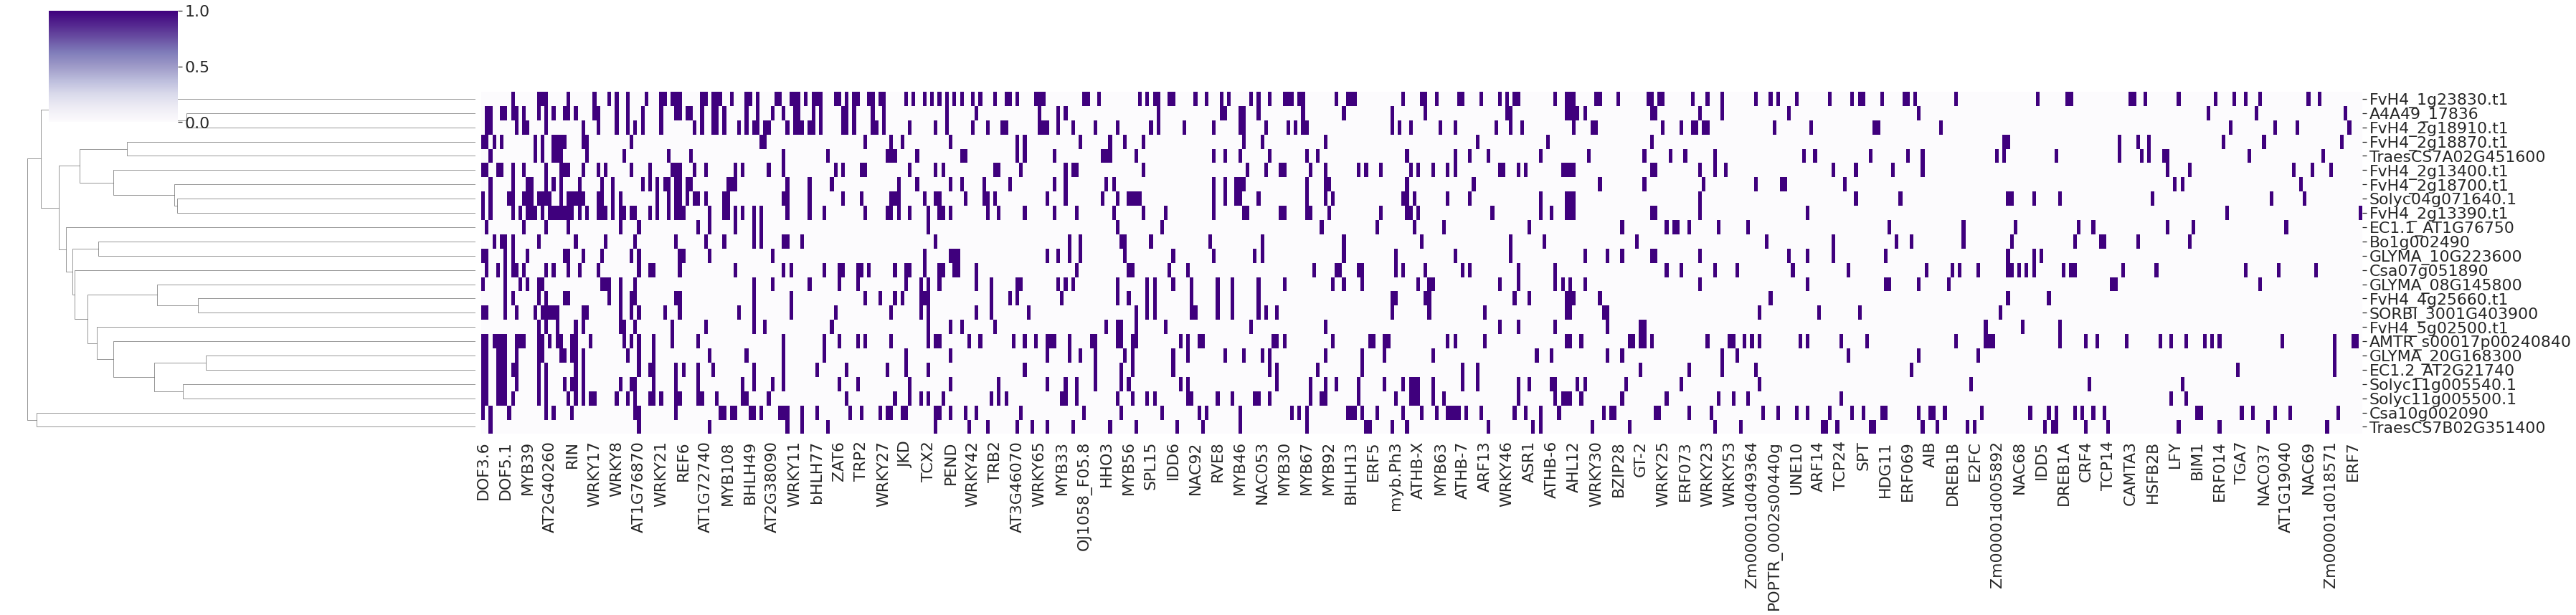

In [8]:
sns.set(font_scale=2)
sns.clustermap(genes_motifs_1,
               figsize=(50,12),
               col_cluster=False,
               metric="correlation",
               cmap="Purples",
               yticklabels=True);
plt.savefig('heatmap_new_group_1', facecolor='white', transparent=False);

## Group 2 - Non-Specific

In [9]:
genes_2 = fimo_2['sequence_name'].unique()
motifs_2 = fimo_2['motif_alt_id'].unique()
genes_motifs_2 = np.zeros([genes_2.shape[0], motifs_2.shape[0]])
genes_motifs_2 = pd.DataFrame(genes_motifs_2, columns=motifs_2, index=genes_2)
for i in range(fimo_2.shape[0]):
    speci = fimo_2.iloc[i,2]
    motif = fimo_2.iloc[i,1]
    genes_motifs_2.loc[speci, motif] = 1

/home/annatoidze/anaconda3/envs/orthofinder/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


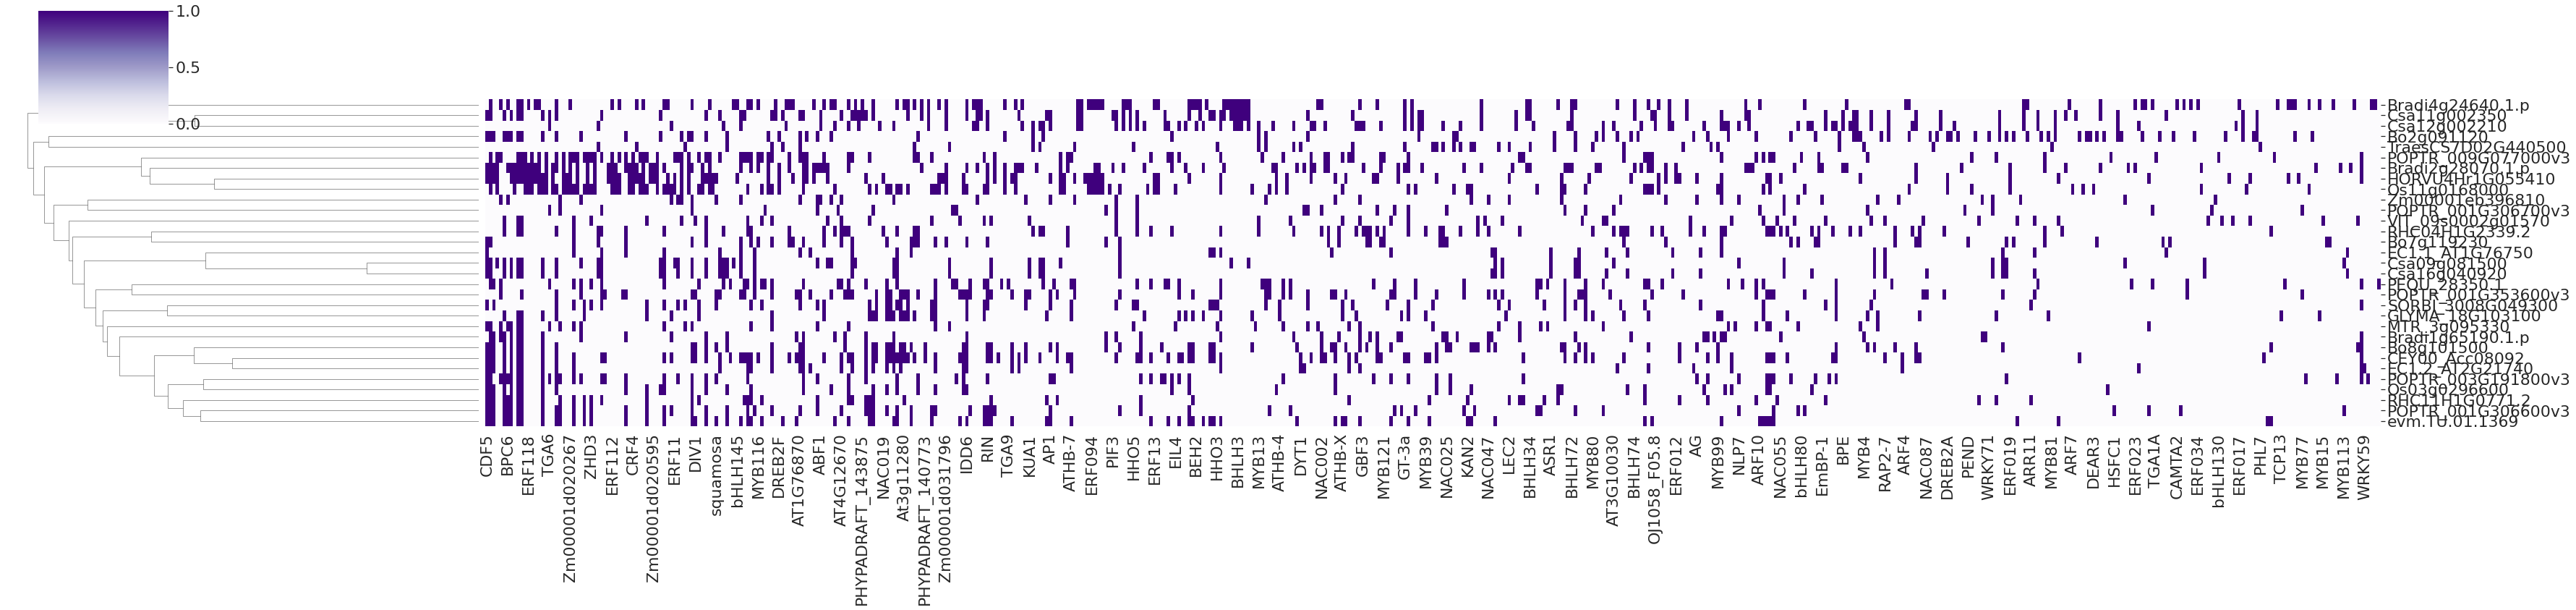

In [10]:
sns.set(font_scale=2)
sns.clustermap(genes_motifs_2,
               figsize=(50,12),
               col_cluster=False,
               metric="correlation",
               cmap="Purples",
               yticklabels=True)              
plt.savefig('heatmap_new_group_2', facecolor='white', transparent=False)

# Group 3 - Vegetative

In [11]:
genes_3 = fimo_3['sequence_name'].unique()
motifs_3 = fimo_3['motif_alt_id'].unique()
genes_motifs_3 = np.zeros([genes_3.shape[0], motifs_3.shape[0]])
genes_motifs_3 = pd.DataFrame(genes_motifs_3, columns=motifs_3, index=genes_3)
for i in range(fimo_3.shape[0]):
    speci = fimo_3.iloc[i,2]
    motif = fimo_3.iloc[i,1]
    genes_motifs_3.loc[speci, motif] = 1

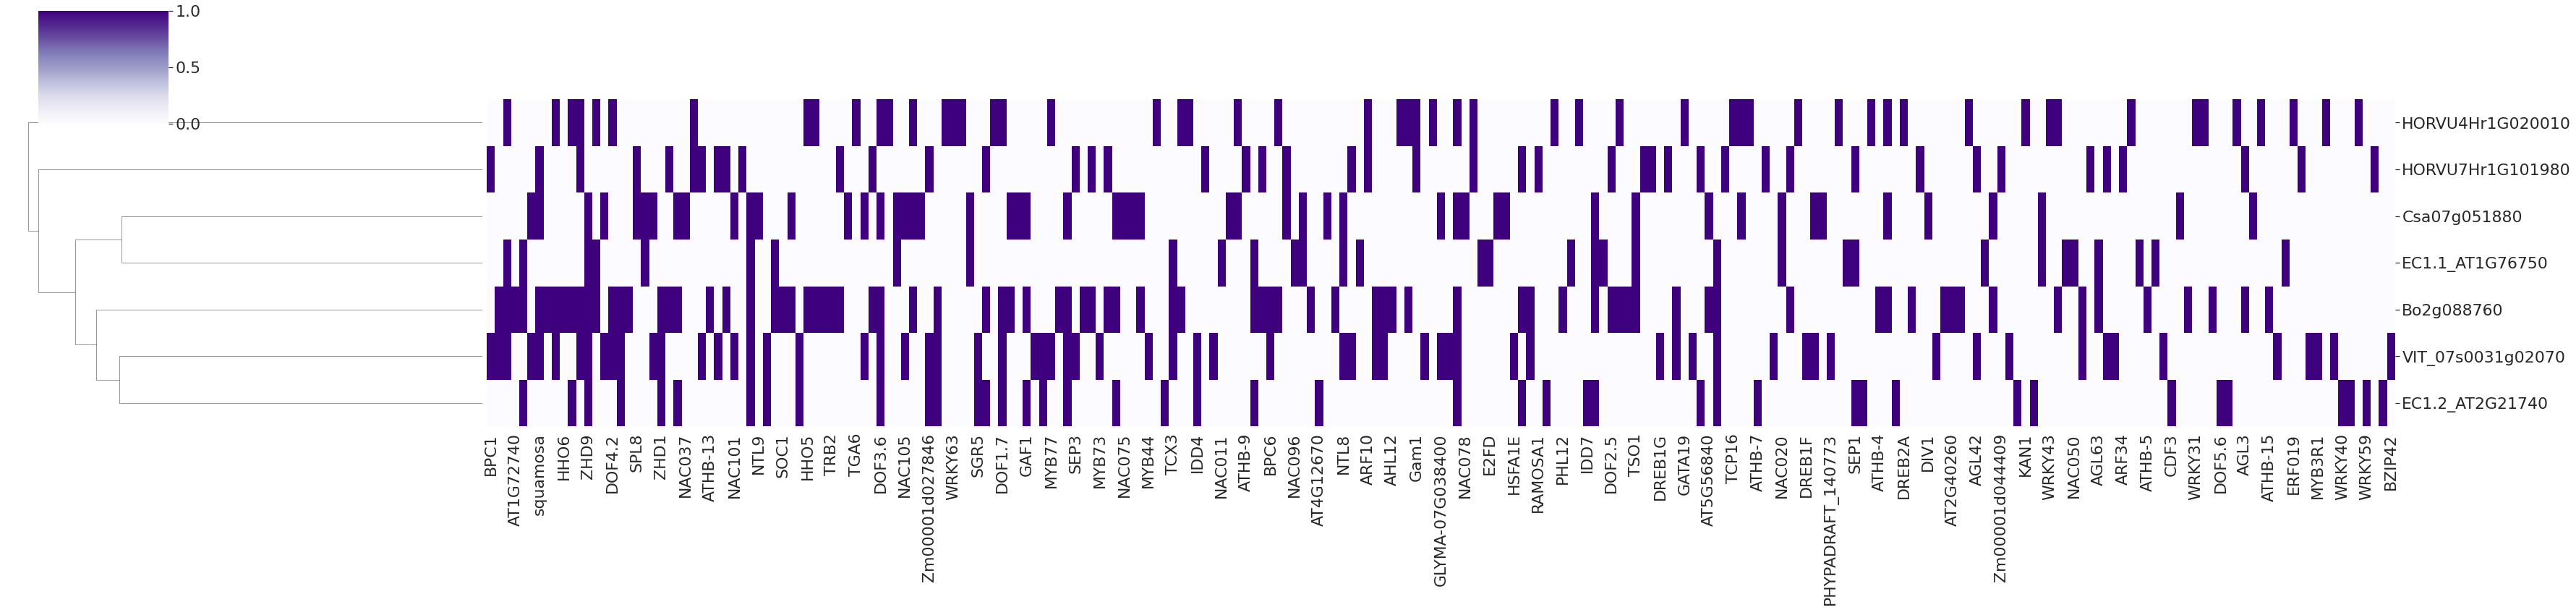

In [12]:
sns.clustermap(genes_motifs_3,
               figsize=(50,12),
               col_cluster=False,
               metric="correlation",
               cmap="Purples",
               yticklabels=True)
plt.savefig('heatmap_new_group_3', facecolor='white', transparent=False)

Here we try to find some motifs, that are frequent/there is some difference between the groups. We exclude the group 3 from calculation, because it is relatively small and it doesn't make sense to compare it with others.

Count each motif:

In [13]:
genes_motifs_1 = genes_motifs_1.transpose()
genes_motifs_1['motif_count'] = genes_motifs_1.sum(axis=1)

genes_motifs_2 = genes_motifs_2.transpose()
genes_motifs_2['motif_count'] = genes_motifs_2.sum(axis=1)

genes_motifs_3 = genes_motifs_3.transpose()
genes_motifs_3['motif_count'] = genes_motifs_3.sum(axis=1)

Filter out only motif and counts of the motif:

In [14]:
motif_by_gene_count_1 = pd.DataFrame({'motif': genes_motifs_1.index, 'm_count_1': genes_motifs_1.motif_count})

motif_by_gene_count_2 = pd.DataFrame({'motif': genes_motifs_2.index, 'm_count_2': genes_motifs_2.motif_count})

motif_by_gene_count_3 = pd.DataFrame({'motif': genes_motifs_3.index, 'm_count_3': genes_motifs_3.motif_count})

Sort the motifs, with the most frequent upwards:

In [15]:
motif_by_gene_count_1 = motif_by_gene_count_1.sort_values('m_count_1', ascending=False)
motif_by_gene_count_2 = motif_by_gene_count_2.sort_values('m_count_2', ascending=False)
motif_by_gene_count_3 = motif_by_gene_count_3.sort_values('m_count_3', ascending=False)

In [16]:
motif_by_gene_count_1.head()

,motif,m_count_1
ZHD9,ZHD9,15.0
DOF3.6,DOF3.6,13.0
CDF5,CDF5,13.0
DOF5.1,DOF5.1,12.0
DOF5.8,DOF5.8,12.0


In [17]:
motif_by_gene_count_2.head()

,motif,m_count_2
DOF5.8,DOF5.8,22.0
DOF3.6,DOF3.6,21.0
DOF5.1,DOF5.1,21.0
Zm00001d027846,Zm00001d027846,19.0
CDF5,CDF5,18.0


In [18]:
motif_by_gene_count_3.head()

,motif,m_count_3
DOF3.6,DOF3.6,5.0
CDF5,CDF5,5.0
DOF1.5,DOF1.5,5.0
ZHD9,ZHD9,5.0
ZHD10,ZHD10,4.0


In [19]:
motif_by_gene_count_1['m_freq_1'] = motif_by_gene_count_1.m_count_1/genes_1.shape[0]
motif_by_gene_count_2['m_freq_2'] = motif_by_gene_count_2.m_count_2/genes_2.shape[0]
motif_by_gene_count_3['m_freq_3'] = motif_by_gene_count_3.m_count_3/genes_3.shape[0]

We exclude group 3 in comparison, because it's too small.

Compare groups 1 and 2: 

In [20]:
motifs_1_2 = pd.merge(motif_by_gene_count_1, motif_by_gene_count_2, left_on='motif', right_on='motif', how='outer')

In [21]:
motifs_1_2.drop(['m_count_1','m_count_2'], axis=1)

,motif,m_freq_1,m_freq_2
0,ZHD9,0.625000,0.483871
1,DOF3.6,0.541667,0.677419
2,CDF5,0.541667,0.580645
3,DOF5.1,0.500000,0.677419
4,DOF5.8,0.500000,0.709677
...,...,...,...
590,KAN4,NaN,0.032258
591,ERF043,NaN,0.032258
592,PHYPADRAFT_28324,NaN,0.032258
593,bZIP910,NaN,0.032258


Searching for motifs that are more frequent than 50 \%:

In [22]:
motif_freq_50 = motifs_1_2.query('m_freq_1 > 0.5 or m_freq_2 > 0.5').drop(['m_count_1','m_count_2'], axis=1)

In [23]:
motif_freq_50

,motif,m_freq_1,m_freq_2
0,ZHD9,0.625000,0.483871
1,DOF3.6,0.541667,0.677419
2,CDF5,0.541667,0.580645
3,DOF5.1,0.500000,0.677419
4,DOF5.8,0.500000,0.709677
10,Zm00001d027846,0.458333,0.612903
15,DOF3.4,0.375000,0.516129
18,DOF1.7,0.375000,0.516129
21,BPC1,0.333333,0.548387
28,DOF1.5,0.333333,0.516129


Group 1:

* ZHD9 - Mostly expressed in flowers, stems and inflorescence and, to a lower extent, in leaves and stems. - https://www.uniprot.org/uniprot/Q9LHF0
* DOF3.6 - Predominantly expressed in roots. - https://www.uniprot.org/uniprot/Q9M2U1
* CDF5 - CDF5 is a circadian regulated transcript that is antiphasic with respect to its natural antisense transcript (NAT) FLORE (AT1G69572).CDF5 transcript accumulation delays flowering. CDF5 links circadian oscillation and photoperiodism.  - https://www.arabidopsis.org/servlets/TairObject?name=AT1G69570&type=locus
* DOF5.1 -  adaxial-abaxial polarity, curling of leaves  - https://pubmed.ncbi.nlm.nih.gov/20807212/
* DOF5.8 - vein network formation - https://pubmed.ncbi.nlm.nih.gov/25794540/

Group 2:

* Zm00001d027846 - Was found with chipseq in Leaf protoplast, function unknown..? - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSM4095466
* DOF3.4 - Arabidopsis Dof protein containing a single 51-amino acid zinc finger DNA-binding domain, which may play an important roles in plant growth and development., expressed in leavaes visible stages, embryo stages, vascular leaf senescent stage - https://www.arabidopsis.org/servlets/TairObject?type=locus&name=at3g50410
* DOF1 (DOF1.7 and DOF1.5) -  expressed during leaves visible stage, flowering and mature plant embryo stage, petal differentiation and expanion stage, vascular leaf senescent stage - https://www.arabidopsis.org/servlets/TairObject?type=locus&name=At1g51700
* BPC1 - BASIC PENTACYSTEINE1 (BPC1) is a regulator of the homeotic Arabidopsis thaliana gene SEEDSTICK (STK), which controls ovule identity. - https://www.arabidopsis.org/servlets/TairObject?name=At2g01930&type=locus
* DOF4.2 - Encodes a nuclear protein that can bind DNA in a sequence specific manner and is involved in seed coat development and shoot branching. It has been shown to activate transcription of a target gene, AtEXPA9. - https://www.arabidopsis.org/servlets/TairObject?name=AT4G21030&type=locus

Find genes that have frequency difference of more than 30 \%:

In [24]:
motif_difference_30 =  motifs_1_2.query('m_freq_1 - m_freq_2 > 0.3 or m_freq_2 - m_freq_1 > 0.3').drop(['m_count_1','m_count_2'], axis=1)

In [25]:
motif_difference_30

,motif,m_freq_1,m_freq_2
25,PEND,0.333333,0.032258


PEND - bZIP Protein, plastid envelope DNA-binding protein - https://www.frontiersin.org/articles/10.3389/fpls.2020.576008/full

In [26]:
motif_freq_50.to_csv("Freq_more_50.csv")
motif_difference_30.to_csv("Diff_more_30.csv")